In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [24]:
df=pd.read_excel('/content/Crude oil and Sustainable Indices - US and India.xlsx')

In [25]:
df.head()

,Date,DJSI-US,Carbonex-India,Crude-Oil
0,2011-02-03,103.93,904.09,101.69
1,2011-02-04,104.10,884.10,99.43
2,2011-02-07,104.66,884.22,99.44
3,2011-02-08,105.06,869.77,99.25
4,2011-02-09,104.82,857.43,100.16


In [26]:
df.isnull().sum()

Date              0
DJSI-US           0
Carbonex-India    0
Crude-Oil         0
dtype: int64

<ipython-input-27-5ffe617281b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Crude-Oil'],color='green')


<Axes: xlabel='Crude-Oil', ylabel='Density'>

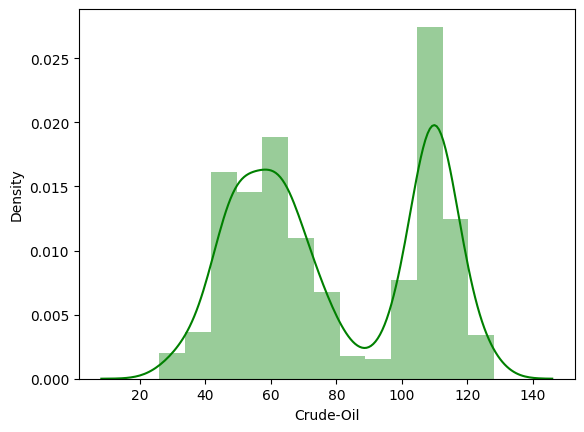

In [27]:
sns.distplot(df['Crude-Oil'],color='green')

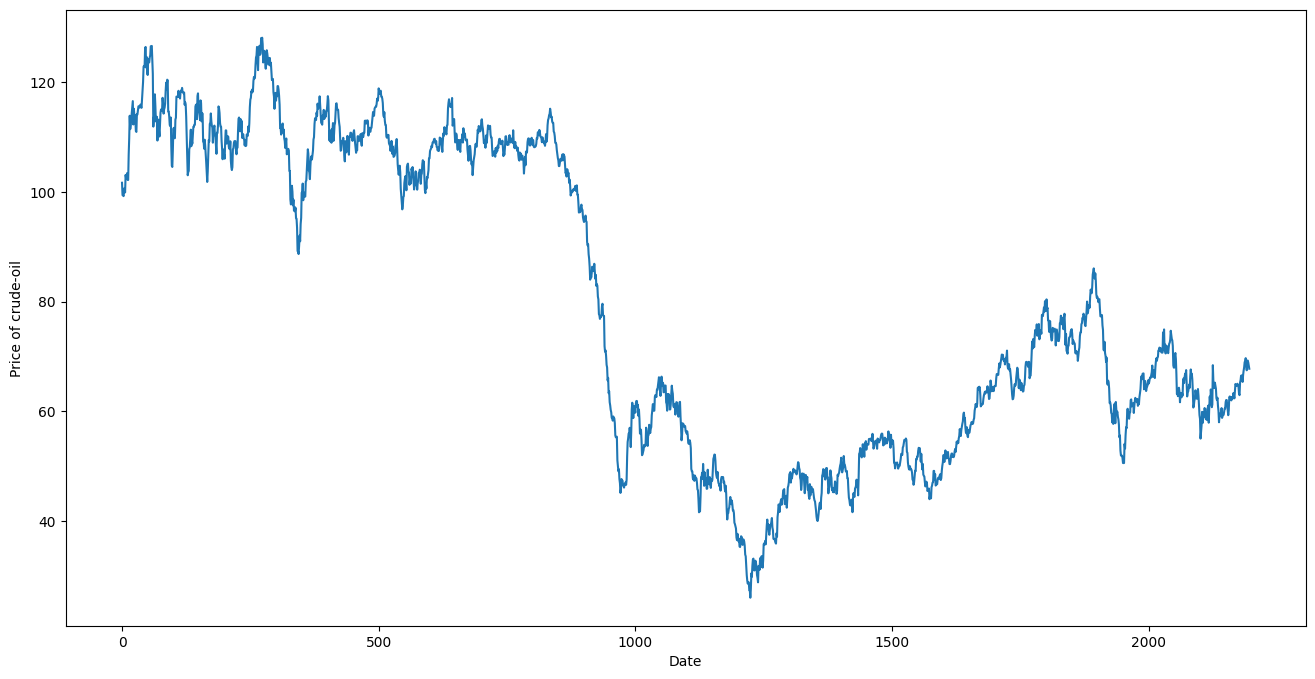

In [28]:
plt.figure(figsize=(16,8))
plt.plot(df['Crude-Oil'])
plt.xlabel('Date')
plt.ylabel('Price of crude-oil')
plt.show()

In [29]:
corr=df.corr()
print(corr['Crude-Oil'])

DJSI-US          -0.621957
Carbonex-India   -0.684658
Crude-Oil         1.000000
Name: Crude-Oil, dtype: float64


<ipython-input-29-7de3c5c95bdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

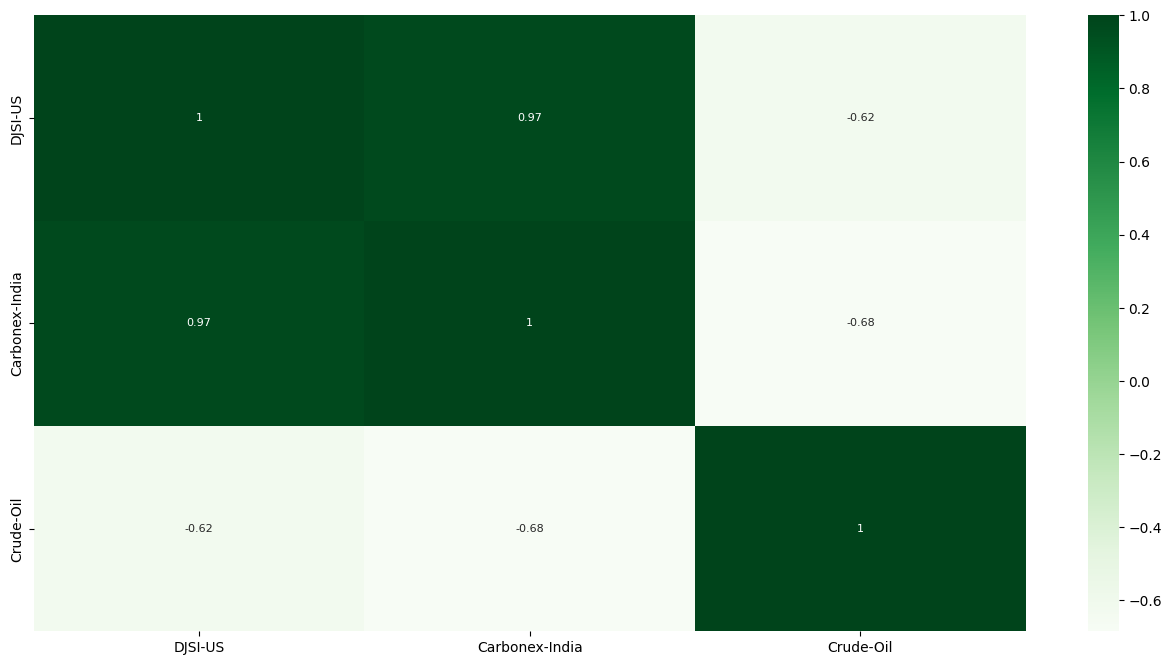

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':8},cmap='Greens')

In [31]:
X=df.drop(['Crude-Oil','Date'],axis=1)
Y=df['Crude-Oil']

X

,DJSI-US,Carbonex-India
0,103.93,904.09
1,104.10,884.10
2,104.66,884.22
3,105.06,869.77
4,104.82,857.43
...,...,...
2192,249.38,1979.02
2193,251.86,1965.36
2194,253.88,1984.50
2195,253.19,1986.38


In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=32)
X_train.shape

(1757, 2)

In [69]:
regressor=RandomForestRegressor(n_estimators =1000)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

In [70]:
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([ 57.99992,  63.66615,  54.18445,  71.40005, 109.04617, 106.7944 ,
        62.50052, 122.99601,  50.39046,  71.09488,  91.43023,  67.53678,
       114.9428 ,  66.91719, 107.74102, 109.75354,  72.2723 , 109.60104,
       108.82216,  57.2083 ,  72.0702 ,  50.28889, 108.69244,  55.85245,
        49.92159, 107.7302 ,  48.23731, 114.71471, 113.04361,  63.03755,
        66.61595,  47.49024,  48.95949, 107.64938,  32.91874, 104.31246,
        46.91376,  71.58441,  61.78951,  57.53565,  56.25703,  51.03962,
        53.8854 ,  60.80234,  66.38107,  66.14384, 107.45482,  57.73579,
       116.46581,  67.6376 , 109.55659,  61.22992,  66.71916,  66.63581,
       112.29002,  57.36093, 102.10879, 108.26001, 105.43878,  58.59997,
        71.38095,  95.75286,  58.46714, 112.09085, 111.38581,  67.95851,
       115.70846,  60.22755,  41.9123 ,  60.30395, 117.95059,  27.63401,
        75.24358,  52.27402, 111.98876,  42.61151,  46.5136 ,  71.25027,
       115.23481,  67.87537,  66.60866, 115.48553, 

In [72]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

print(error_score)

0.7957456790818992


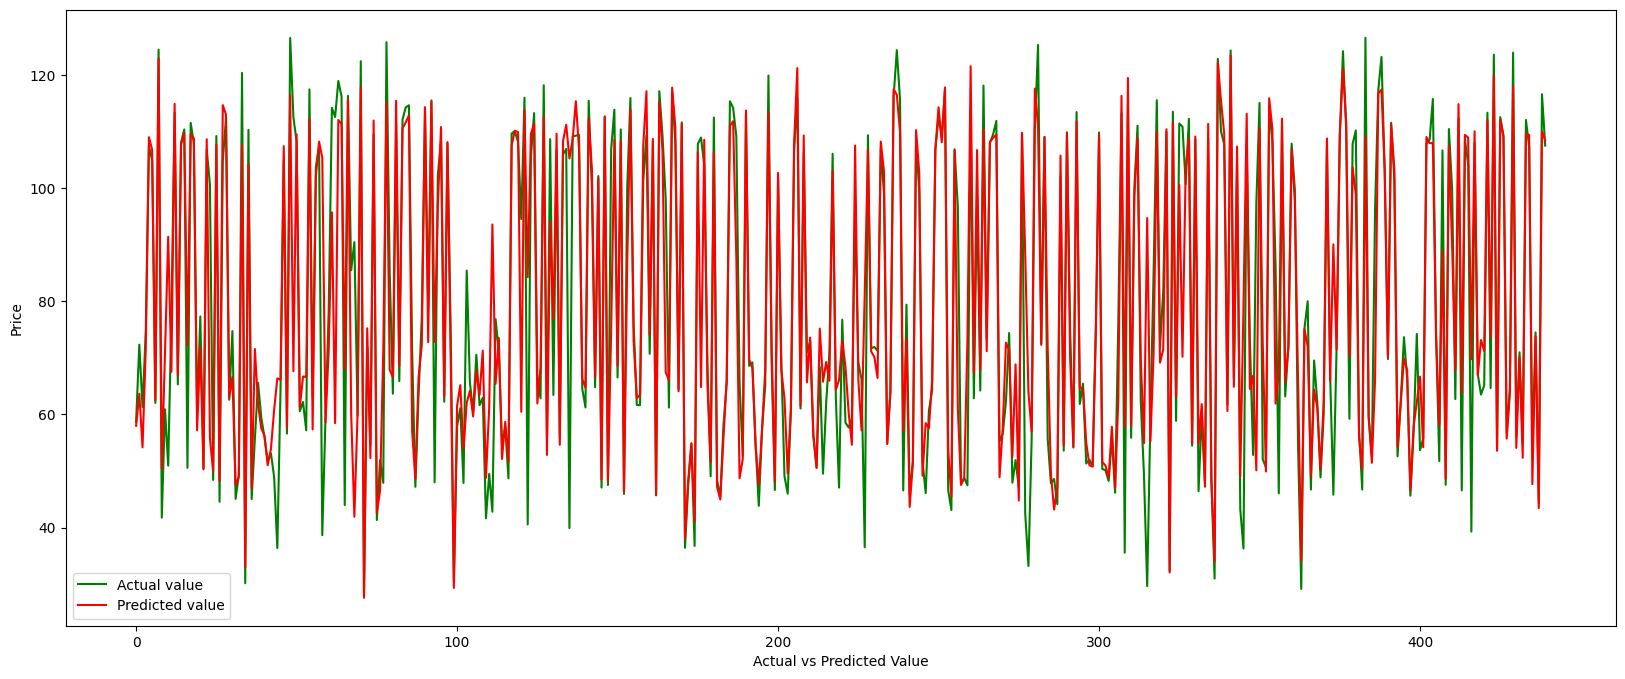

In [73]:
Y_test=list(Y_test)
plt.figure(figsize=(20,8))
plt.plot(Y_test,color='green', label='Actual value')
plt.plot(test_data_prediction,color='red',label='Predicted value')
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Price')
plt.legend()
plt.show()